<a href="https://colab.research.google.com/github/khanfs/Modelling-Biology/blob/main/06_Switch_systems_and_excitability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Switch systems and excitability

## Attractors recap

An *attractor* is a set to which the system evolves after sufficiently long time.
Trajectories that become close to the attactor must remain close for all time (even if slightly perturbed).

- Stable steady-states
- Saddle points (unstable)
- Limit cycles
- Attractors in higher dimensional systems

## Bifurcations recap

A bifurcation is a *qualitative change in the system dependent on the change in the value of a parameter*.
Often this involves creation or distruction of steady-states, or changes in their stability.

- Saddle-node bifurcations
- Transcritical bifurcations
- Cusp bifurcations
- Hopf bifurcations

## Switch systems

Often it is a useful characteristic for a system (e.g. a cell) to be in either of two discrete states, rather than any state in between these two.
But how do biological systems *choose* which state to be in given continuous signals?

## Example, genetic switch

Suppose a cell reacts to some substance $s$ by producing a product RNA $p$.
Suppose that that RNA is also able to *autocatalytically* activate production of itself.

### Model outline

**Aim:** To model the signal propagation with and without stimulus.

**Scale:** Molecular

**Approach/method:** Ordinary differential equation

**Simplifications:**

- Not concerned with how $s$ interacts with the promoter.
- Large concentrations of $s$, $p$ (ignoring stochasticity).
- We will ignore the intermediate steps in the production of RNA from a gene.

**Assumptions:**

- Linear production of $p$ dependent on concentration of $s$.
- Autocatayltic activation operates according to the *Hill function*:
$$ f_\text{Hill}(x) = \frac{x^n}{K^n + x^n} $$
- Exponential decay of $p$.

### Model mathematics

The above assumptions lead to the model:

$$ \frac{dp}{dt} = k_\text{act}s + \frac{p^n}{K^n + p^n} - k_\text{decay} p $$

What are the dimensions of the parameters?

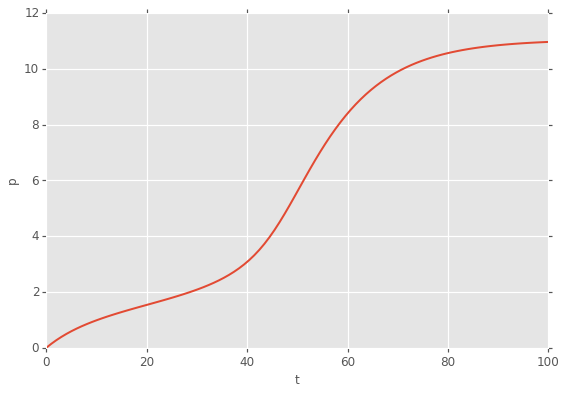

<function python.f06.plot_switch>

In [ ]:
from python.f06 import *
%matplotlib inline

# try varying p0
# then set kact_s < 0.1, and try varying p0
interact(plot_switch, k=fixed(4), n=fixed(3))

The steady-states are solutions to:

$$ 0 = k_\text{act}s + \frac{p^n}{K^n + p^n} - k_\text{decay} p $$

That is:

$$ \frac{p^n}{K^n + p^n} = k_\text{decay} p - k_\text{act}s $$

(Intersections between the Hill equation and a straight line.)

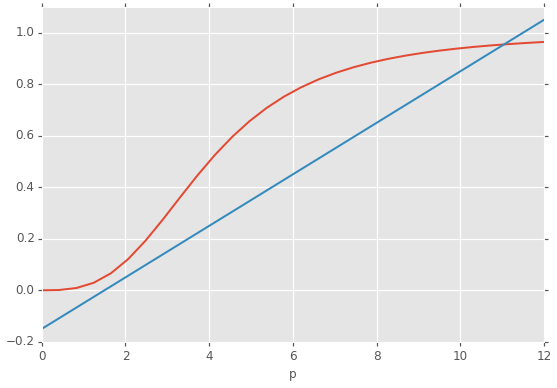

<function python.f06.plot_switch_eqns>

In [ ]:
interact(plot_switch_eqns, k=fixed(4), n=fixed(3))

So we see that the qualitative behaviour of the system depends on whether the maximum slope of the Hill function is less than or greater than $k_\text{decay}$ (the slope of the straight line).

- If the maximum slope is less than $k_\text{decay}$, then there is a unique stable steady-state.
- If the maximum slope is greater than $k_\text{decay}$, then either there is a single unique stable steady-state; or there are three steady-states, two of which are stable and one of which is unstable.

If we plot the bifurcation diagram of $p$ as a function of $k_\text{act} s$ in this second case, we can see multiple saddle-node bifurcations.

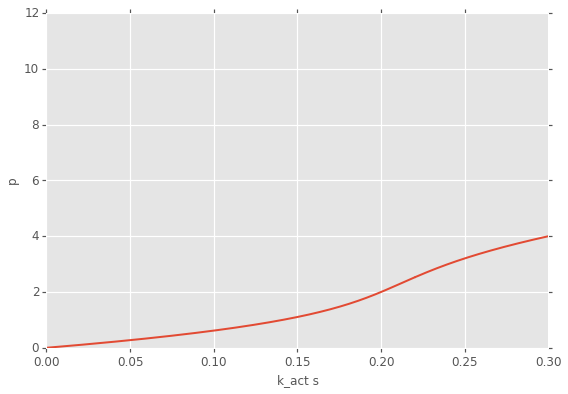

<function python.f06.plot_switch_ss>

In [ ]:
# try kdecay = 0.13
interact(plot_switch_ss, k=fixed(4)) # n = 2

This is an example of *hysteresis*.

Imagine we start at $p=0$ and $k_\text{act} s=0$ (with $k_\text{decay} = 0.13$.

- Increasing $k_\text{act} s$ the dynamics of the system initially stay at the lower steady-state.
- When $k_\text{act} s > 0.75$ (approximately) this steady-state disappears, and the only attractive steady-state is now the higher steady-state.
- If $k_\text{act} s$ now decreases, we initally stay at the higher steady-state.
- Now when $k_\text{act} s < 0.2$ (approximately) this steady-state disappears, and the only attractive steady-state is now the lower steady-state.

In this way, we have a *switching* system, which is robust to small perturbations.

## Spatial switch systems

Imagine now that our cells are capable of exporting the product described above, which can then diffuse through the extracellular medium, and be imported into neighbouring cells.

### Model outline

**Aim:** To model the signal propagation with and without stimulus.

**Scale:** Molecular, populations of cells

**Approach/method:** Partial differential equations

**Simplifications:**

- As above.
- Cell population modelled by continuous 1-dimensional variable $x$.

**Assumptions:**

- As above.
- Cells can (perfectly, and in no time) import and export product.

### Model mathematics

We just saw the system:

$$ \frac{dp}{dt} = k_\text{act}s + \frac{p^n}{K^n + p^n} - k_\text{decay} p $$

We can write:

$$f(p) = \frac{p^n}{k^n + p^n} - (k_\text{decay} p - k_\text{act}s) = \frac{g(p)}{k^n + p^n} \\\text{ where } g(p) = p^n - (k^n + p^n)(k_\text{decay} p - k_\text{act}s) $$

We have three steady-states $p_1<p_2<p_3$, such that $f(p_i)=0$ and so $g(p_i)=0$.
Furthermore $g(p_i)$ has no other real roots in the range $p\geq 0$, so we can write:

$$g(p) = A(p)(p-p_1)(p_2 - p)(p - p_3)$$

Now consider the spatial system of the form:

$$ \frac{\partial p}{\partial t} = f(p) + D\frac{\partial^2 p}{\partial x^2} $$

This equation again allows three steady-states, $p_1<p_2<p_3$.
We want to know what happens if the system is at rest at the low-concentration steady-state, and a local disturbance is introduced which increases the concentration to the high-concentration steady-state.

We will look for a travelling wave solution of the form:

$$ p(x,t) = U(x-ct) $$

With:

$$ U(-\infty) = p_3,\; U(\infty) = p_1$$

This has an explicit solution of the form:

$$ U(z) = \frac{p_3 + K p_1 e^{a(p_3-p_1)z}}{1 + K e^{a(p_3-p_1)z}} $$
    
See Murray p465.

### Example, the Repressilator

> The repressilator is a synthetic genetic regulatory network reported in a paper by Michael Elowitz and Stanislas Leibler in 2000. This network was designed from scratch to exhibit a stable oscillation which is reported via the expression of green fluorescent protein, and hence acts like an electrical oscillator system with fixed time periods. The network was implemented in Escherichia coli using standard molecular biology methods and observations were performed that verify that the engineered colonies do indeed exhibit the desired oscillatory behavior.
> ![](https://upload.wikimedia.org/wikipedia/commons/4/40/Repressilator_GRN.png)
> ![](https://upload.wikimedia.org/wikipedia/commons/e/e4/Continuous-repressilator.jpg)
>[Wikipedia](https://en.wikipedia.org/wiki/Repressilator)

## Peridocity and excitability

We have already seen periodicity in the predator-prey system, where it was an emergent behaviour caused by the interaction of the two species.
Periodicity can also be an important behaviour for the time-regulated behaviour of many biological systems, for example:

- Mitosis
- Circadian rhythms
- ...


## The Hodgkin-Huxley model

The *Hodgkin-Huxley model* is a model which describes the initiation and propagation of *action potentials* in neurons.

> Alan Lloyd Hodgkin and Andrew Huxley described the model in 1952 to explain the ionic mechanisms underlying the initiation and propagation of action potentials in the squid giant axon. They received the 1963 Nobel Prize in Physiology or Medicine for this work. [Wikipedia](https://en.wikipedia.org/wiki/Hodgkin–Huxley_model)

Propagation of signals in neurons is electrical in nature.
A electrical signal propagates down an *axon* to terminal branches which form *synapses* with neighbouring neurons.
A propagated signal is called an *action potential*.

Neuronal signals travel along the cell membrane of the axon in the form of localised potential differences across the membrane.

In the resting state the cytosol inside the axon is slightly negative with respect to the exterior of the cell.
This potential difference is maintained by sodium and potassium pumps on the cell surface.
When activated, the intracellular potential goes from roughly -70mV to 40mV.

The signalling process is as follows:

1. Some event (e.g. a stimulating electrode) raises the potential difference at the base of the axon above a threshold voltage.
2. Sodium channels open, causing the membrane potential to depolarise further.
3. After a short delay, the potassium channels open. This restores the original polarisation of the membrane (with a small overshoot).
4. The sodium channels close.
5. Adjacent sites experience the threshold level to set in motion step 2.

The action potential thus travels down the axon without attenuating or change in shape: a *travelling wave*.

The Hodgkin-Huxley model is based on an electrical circuit metaphor.

> ![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/98/Hodgkin-Huxley.svg/350px-Hodgkin-Huxley.svg.png)
> Basic components of Hodgkin–Huxley-type models. Hodgkin–Huxley type models represent the biophysical characteristic of cell membranes. The lipid bilayer is represented as a capacitance (Cm). Voltage-gated and leak ion channels are represented by nonlinear (gn) and linear (gL) conductances, respectively. The electrochemical gradients driving the flow of ions are represented by batteries (E), and ion pumps and exchangers are represented by current sources (Ip). [Wikipedia](https://en.wikipedia.org/wiki/Hodgkin–Huxley_model)

Hodgkin and Huxley developed their model based on experimental observations, it is (at least in part) an *empirical* model, based on choosing mathematical functions to fit the observed behaviour.
The precise mechanisms were unknown to them at the time.

### Model outline

**Aim:** To understand the propagation of action potentials.

**Scale:** Molecular/Cell

**Approach/method:** Continuous dynamical system

**Simplifications:**

- ...

**Assumptions:**

- ...

### Model mathematics

Let $I_\text{app}(t)$ be the current (pointing out of the cell).
This has to be balanced by the capacitance of the cell membrane, and the currents due to the individual chemical species:

$$ I_\text{app}(t) = C\frac{dV}{dt} + I_\text{Na} + I_\text{K} + I_\text{L}$$

Or:

$$ C\frac{dV}{dt} = I_\text{app} - I_\text{Na} - I_\text{K} - I_\text{L}$$

Where $I_\text{Na}$ is the current due to sodium, $I_\text{K}$ is the current due to potassium, and $I_\text{L}$ is the current due to leakage.

Recall *Ohm's law*, the voltage drop across a resistor is proportional to the current through the resistor $R=\frac{1}{g}$:

$$ V(t) = I(t)R = \frac{I(t)}{g} $$

So we can set:

$$\begin{aligned}
    I_\text{Na} &= g_\text{Na}(V-V_\text{Na}) \\
    I_\text{K} &= g_\text{K}(V-V_\text{K}) \\
    I_\text{L} &= g_\text{L}(V-V_\text{L}) \\
    \end{aligned}$$

Where $g_\text{Na}$ is the sodium conductange, $V_\text{Na}$ is the constant equilibrium potential for sodium, etc.

This gives us the equation:

$$\begin{aligned}
    C \frac{dV}{dt} &= I_\text{app} - g_\text{Na}(V)(V - V_\text{Na}) - g_\text{K}(V)(V - V_\text{K}) - g_\text{L}(V - V_\text{L})
    \end{aligned}$$
    
Given the above, Hodgkin and Huxley postulated that the conductances of sodium and potassium ions were dependent on time (and $V$) and so chose to set:

$$\begin{aligned}
    g_\text{Na} = \bar{g}_\text{Na} m(V)^3 h(V) \\
    g_\text{K} = \bar{g}_\text{K} n(V)^4 \\
    \end{aligned}$$
    
Where the $\bar{g}$ are constant, and $n(V)$, $m(V)$, and $h(V)$ will be defined below.

This leads to a final 4-dimensional system:
    
$$\begin{aligned}
    C \frac{dV}{dt} &= I_\text{app} - \bar{g}_\text{Na} m^3 h(V - V_\text{Na}) - \bar{g}_\text{K} n^4(V - V_\text{K}) - g_\text{L}(V - V_\text{L}) \\
    \frac{dn}{dt} &= \alpha_n(V)(1-n) - \beta_n(V)n \\
    \frac{dm}{dt} &= \alpha_m(V)(1-m) - \beta_m(V)m \\
    \frac{dh}{dt} &= \alpha_h(V)(1-h) - \beta_h(V)h
    \end{aligned}$$

With $\alpha_i$ and $\beta_i$ determined empirically from experimental data:

$$\begin{aligned}
    \alpha_n(v) &= 0.01\frac{-v+10}{e^{\frac{-v+10}{10}} - 1} &
    \beta_n(v) &= 0.125e^{\frac{-v}{80}} \\
    \alpha_m(v) &= 0.1\frac{-v+25}{e^{\frac{-v+25}{10}} - 1} &
    \beta_m(v) &= 4 e^{\frac{-v}{18}} \\
    \alpha_h(v) &= 0.07e^{\frac{-v}{20}} &
    \beta_h(v) &= \frac{1}{e^{\frac{-v+30}{10}} - 1}
    \end{aligned}$$

This model can be numerically simulated, with: $c = 1$; $g_\text{Na} = 120$; $g_\text{K} = 36$; $g_\text{L} = 0.3$, $v_\text{Na} = 115$; $v_\text{K} = -12$; $v_\text{L} = 10.5989$.

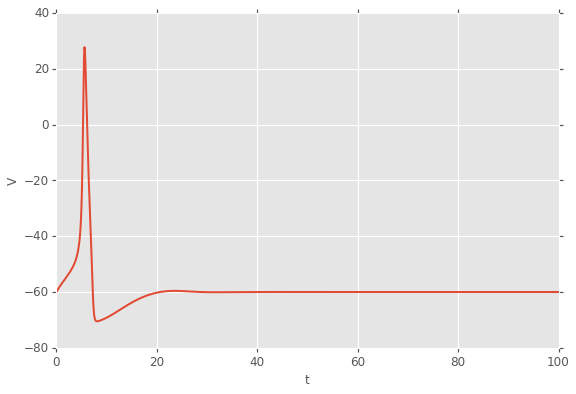

<function python.f06.plot_hh>

In [ ]:
interact(plot_hh)

So we see that the system is stable for $I_\text{app} = 0$, but with a perturbation which is sufficiently large we see a large (excitable) response, before returning to the original value.

## The FitzHugh-Nagumo model

The FitzHugh-Nagumo model is a simplification of the Hodgkin and Huxley model.
It exists not to portray accurately the quantitive properties of action potentials, but as a simpler model in which it is possible to observe interactions between variables which lead to properties such as excitability and oscillations.

### Model outline

We reduce the model in the following steps:

- Assume a constant applied current $I_\text{app}$.
- Assume that $m$ is at (quasi-)equilibrium so that $\frac{dm}{dt}=0$.
- Assume $h=h_0$ is constant.
- Apply a non-dimensionalisation.

### Model mathematics

The resulting 2-variable model in $V$ and $n$ can then be approximated by:

$$\begin{aligned}
    \frac{dv}{dt} &= v(a - v)(v - 1) - w + I_\text{app} \\
    \frac{dw}{dt} &= b v - c w
    \end{aligned}$$
    
Where $0<a<1$ and $b$ and $\gamma$ are positive constants.
The vraible $v$ is equivalent to the membrane potential, and $w$ plays the roles of $m$, $n$, and $h$.

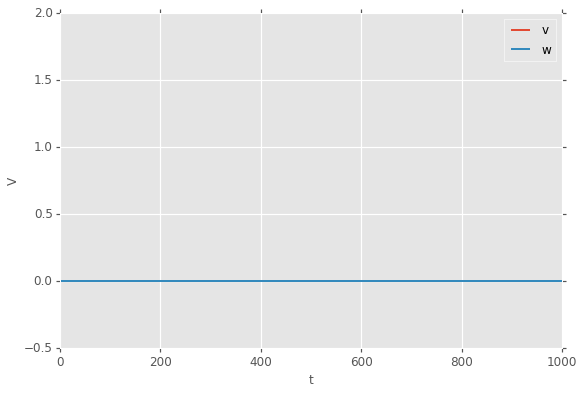

<function python.f06.plot_fitzn>

In [ ]:
interact(plot_fitzn, Iapp=fixed(0), a=fixed(0.25), b=fixed(0.002), c=fixed(0.002))

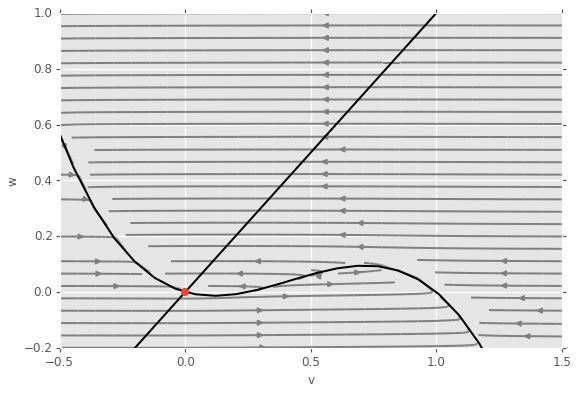

<function python.f06.plot_fitzn_pp>

In [ ]:
interact(plot_fitzn_pp, Iapp=fixed(0), a=fixed(0.25), b=fixed(0.002), c=fixed(0.002))

### Stability of the model

The steady-states are given by solutions to the equations:

$$\begin{aligned}
    0 &= v(a - v)(v - 1) - w + I_\text{app} \\
    0 &= b v - c w
    \end{aligned}$$
    
Note that these are equivalent to the curves:

$$\begin{aligned}
    w &= v(a - v)(v - 1) + I_\text{app} \\
    w &= \frac{b}{c} v
    \end{aligned}$$
    
These define the *nullclines* of the system, and each equation holds whenever one of the rates of change is zero.

Together, this means that the steady-states are solutions to the cubic equation:

$$ v^3 - (1+a)v^2 + \left(a + \tfrac{b}{c}\right)v - I_\text{app} = 0 $$

Cubic equations are in general solvable, but we will use $I_\text{app} = 0$ which means one solution is $v=0$, and the other two are solutions to the quadratic:

$$ v^2 - (1+a)v + \left(a + \tfrac{b}{c}\right) = 0 $$

We will consider the special case when $a=\frac{1}{3}$, $b=\frac{1}{9}$, and $c=1$:

$$ v^2 - \frac{4}{3} v + \frac{4}{9} = 0 $$

So:

$$ \left(v - \tfrac{2}{3}\right)\left(v - \tfrac{2}{3}\right) = 0 $$

Hence there are two unique steady-state solutions:

$$ \begin{pmatrix}v\\w\end{pmatrix} = 
    \begin{pmatrix}0\\0\end{pmatrix} \text{ and }
    \begin{pmatrix}\frac{2}{3}\\\frac{2}{27}\end{pmatrix}$$
    
We can analyse the stability of these steady-states from the Jacobian:

$$J = \begin{bmatrix}
    -3v^2 + (1 + a)v - a & -1 \\
    b & -c 
    \end{bmatrix}$$
    
Which gives, at the $(0,0)$ steady-state with the parameters from before:

$$J = \begin{bmatrix}
    -\frac{1}{3} & -1 \\
    -\frac{1}{9} & -1
    \end{bmatrix}$$
    
The eigenvalues of this matrix are $\lambda_1 = -\frac{2}{3}$ and $\lambda_2 = -\frac{2}{3}$, so this is a stable node.

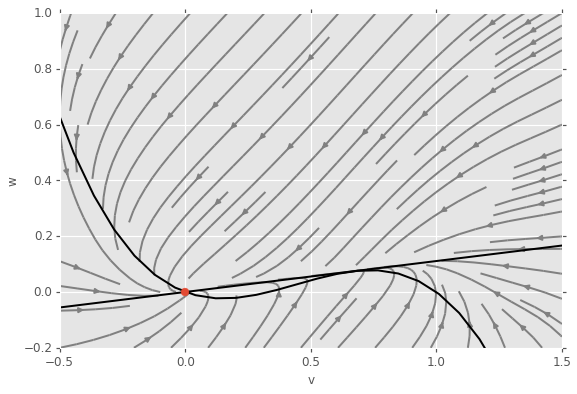

<function python.f06.plot_fitzn_pp>

In [ ]:
interact(plot_fitzn_pp, Iapp=fixed(0), a=(0.333,0.334), b=fixed(0.111), c=fixed(1))

### Hopf bifurcation in the FitzHugh-Nagumo model

With $I_\text{app}=0$ we observe a persistent steady-state for the FitzHugh-Nagumo model at $(0,0)$. But what happens when $I_\text{app}\neq 0$?

When $0<I_\text{app}\ll 1$, we can ignore terms of order $v^2$ and higher, and so:

$$ \left(a + \tfrac{b}{c}\right)v - I_\text{app} = 0 $$

Rearranging:

$$ v = \frac{I_\text{app}}{a + \tfrac{b}{c}} $$

So the solution moves away from $v=0$. As this happens the trace of the Jacobian can become positive:

$$J = \begin{bmatrix}
    -3v^2 + (1 + a)v - a & -1 \\
    b & -c 
    \end{bmatrix}
    \implies
    \text{tr}(J) = -3v^2 + (1 + a)v - a - c $$
    
So the steady-state changes from a stable focus to an unstable focus, which is characteristic of a *(supercritical) Hopf bifurcation*.

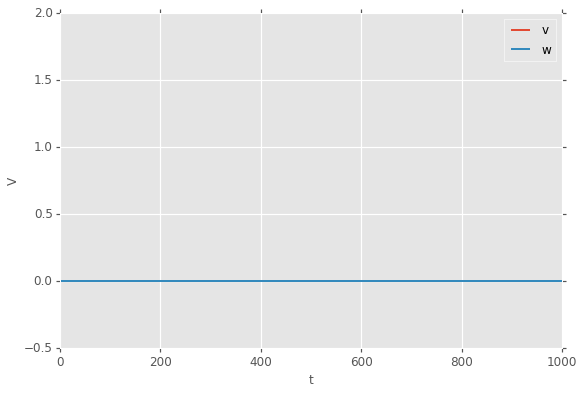

<function python.f06.plot_fitzn>

In [ ]:
interact(plot_fitzn, v0=fixed(0), a=fixed(0.25), b=fixed(0.002), c=fixed(0.002))

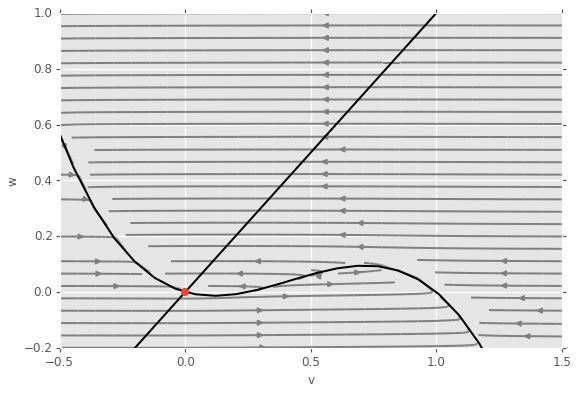

<function python.f06.plot_fitzn_pp>

In [ ]:
interact(plot_fitzn_pp, v0=fixed(0), a=fixed(0.25), b=fixed(0.002), c=fixed(0.002))

### Model discussion

Is the model realistic? Is it useful?

In [ ]:
# Jupyter notebook setup
from IPython.core.display import HTML
HTML(open("../styles/custom.css", "r").read())